In [ ]:
!pip install -U fastai gradio huggingface_hub
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.3/489.3 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66

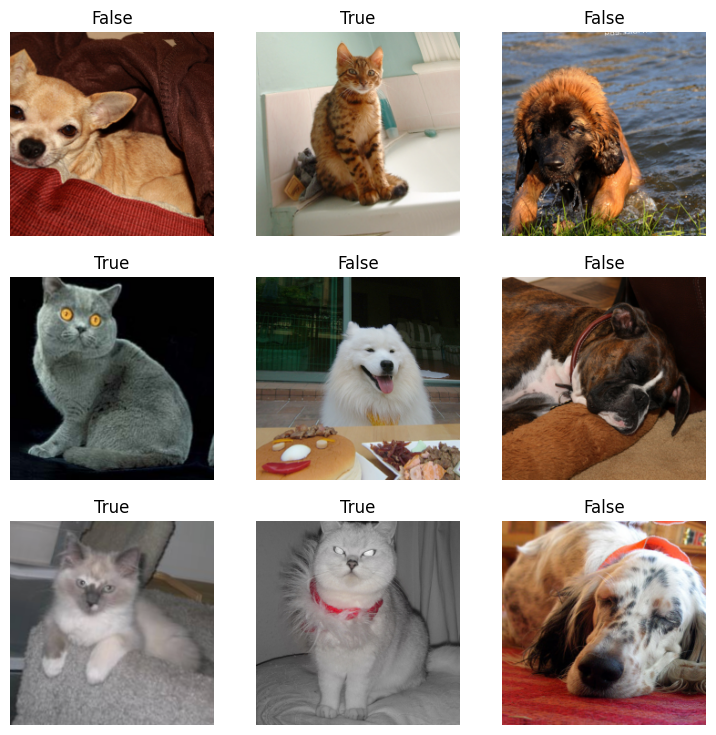

In [ ]:
path = untar_data(URLs.PETS)
def label_func(f): return f.name[0].isupper()

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=label_func,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

dls = dblock.dataloaders(path/"images", bs=32)
dls.show_batch(max_n=9)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 185MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.137621,0.017880,0.995264,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.074596,0.034704,0.987821,00:15
1,0.061377,0.071185,0.983085,00:15
2,0.033677,0.011586,0.995940,00:15
3,0.019467,0.008061,0.997970,00:15
4,0.011632,0.008479,0.997294,00:15


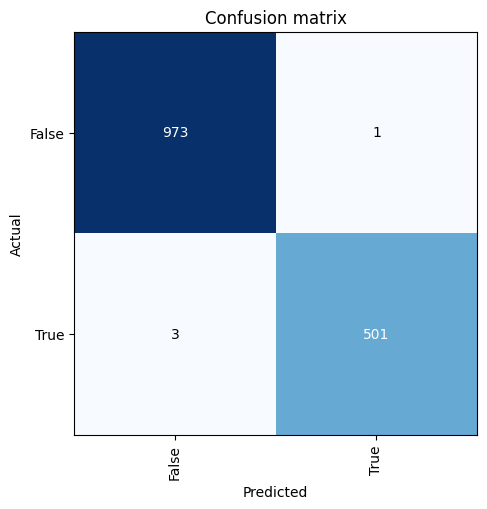

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

SuggestedLRs(valley=2.75422871709452e-06)

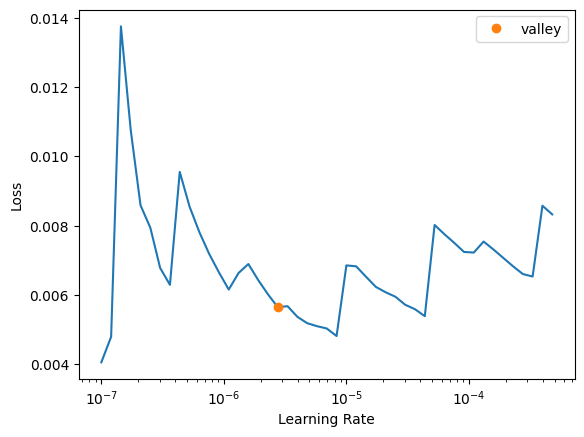

In [ ]:
learn.lr_find()

In [38]:
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(1e-6, 2.75e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.016584,0.007436,0.997970,00:15
1,0.011421,0.006422,0.997970,00:15
2,0.008795,0.006838,0.997970,00:15
3,0.022054,0.007657,0.997970,00:15
4,0.009781,0.007734,0.997970,00:15


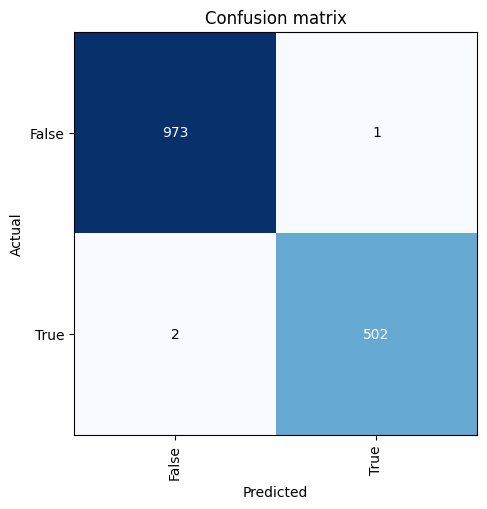

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

In [ ]:
from google.colab import files
learn.export('/content/export.pkl')
files.download('/content/export.pkl')